# Introduction
In this assignment we use the `scipy.signals` library to simulate some systems like circuits and spring systems. We solve differential equations using Lalplace Transform.We can simulate a model in python if we know the transfer function $H(s)$ and the Laplace Transform of the input.

 # Import Libraries

In [1]:
import scipy.signal as sp
import numpy as np
import matplotlib.pyplot as plt

# Question 1:
We have a spring mass system which satisfies  $\ddot{x} +2.25x=f(t)$ where $f(t)$ is the input excitation.<br/>
Initial conditions given are $\dot{x(0)}=x(0)=0$.<br/>
The transfer function of the system is $H(s)=\frac{1}{s^2+2.25}$<br/>
We also have $f(t)=cos(1.5t)e^{-0.5t}u(t)$.<br/>
$\therefore$ we have the Laplce transform  $\mathcal{L}(f(t))=F(s)=\frac{s+0.5}{(s+0.5)^2+2.25}$<br/>
$\therefore$ the output $X_0(t)=\mathcal{L}^{-1}(F(s).H(s))$

In [2]:
def function(w,alpha,plot):
    numerator=[1,alpha]
    p=np.poly1d([1,2*alpha,w**2+alpha**2]) #denominator of F(s)
    q=np.poly1d([1,0,2.25]) #X(s)*(s^2+2.25)
    denominator=np.polymul(p,q) #denominator of X(s)
    list(denominator)
    X=sp.lti(numerator,denominator)
    t,x=sp.impulse(X,None,np.linspace(0,50,10001))
    if plot==True:
        plt.plot(t,x)
        plt.title('X vs t for input $\cos(%f*t)e^{-%f t}u_0(t)$'%(w,alpha))
        plt.xlabel('Time')
        plt.ylabel('Position of spring')
        plt.grid()
        plt.show()
    return X,x,t #returning transfer function impulse response and time vector

# Explanation of the graph obtained:
Let the general form of the input equation be $f(t)=cos(\omega{t}) e^{-\alpha{t}}u(t))$<br/>
1: In the first graph where the input $\omega=\omega_0=1.5$ and $\alpha=0.5$ where $\omega_0$ is the natural frequency of the system the system resonates and as the damping factor $\alpha$ is large the system quickly reaches it's steady state.<br/>
2:In the second graph again the system has the same $\omega$ and $\alpha=0.05$.Thus the damping factor is smaller and thus it reaches the steady state after much more time as compared to the previous input.Also the amplitude is bigger than the previous one

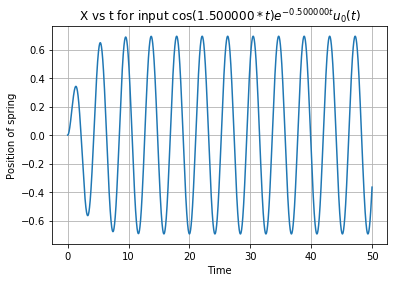

In [3]:
X,x,t=function(1.5,0.5,True)

# Question 2:

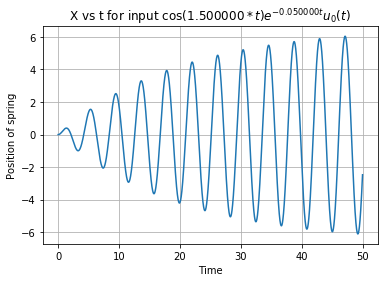

In [4]:
X,x,t=function(1.5,0.05,True)

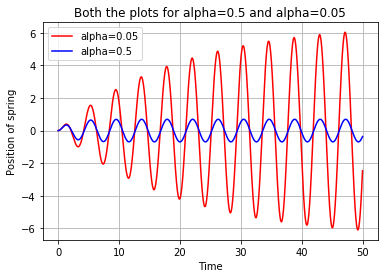

In [5]:
X1,x1,t1=function(1.5,0.05,False)
X2,x2,t=function(1.5,0.5,False)
plt.plot(t,x1,'r',label='alpha=0.05')
plt.plot(t,x2,'b',label='alpha=0.5')
plt.xlabel('Time')
plt.ylabel('Position of spring')
plt.title('Both the plots for alpha=0.5 and alpha=0.05')
plt.grid()
plt.legend()
plt.show()

# Question 3:
In this part the input frequency is varied from 1.4 to 1.6 in steps of 0.05.<br/> The resonant frequency of the system is 1.5 rad/s.<br/> Thus the maximum amplitude is expected when the input frequency is 1.5 rad/s.<br/>As the input frequency is varied the  maximum amplitude changes and hence the output graph.

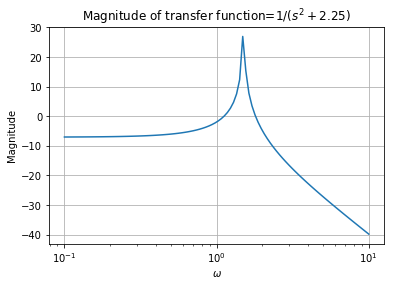

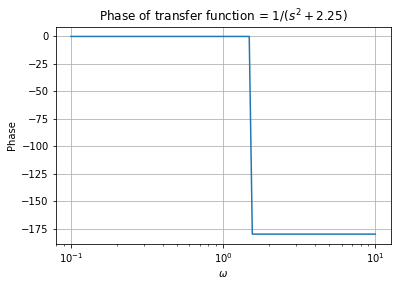

In [6]:
w_0=np.arange(1.4,1.6,0.05)
alpha=0.05
w0=1.5
H=sp.lti(1,[1,0,2.25])
w,mag,phi=H.bode()
plt.title('Magnitude of transfer function=${1}/({s^2+2.25}) $')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.semilogx(w,mag)
plt.grid()
plt.show()
plt.title('Phase of transfer function = ${1}/({s^2+2.25}) $')
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.semilogx(w,phi)
plt.grid()
plt.show()

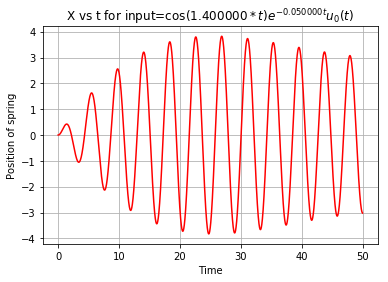

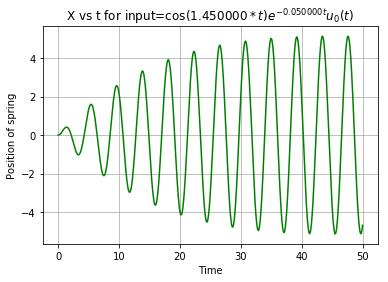

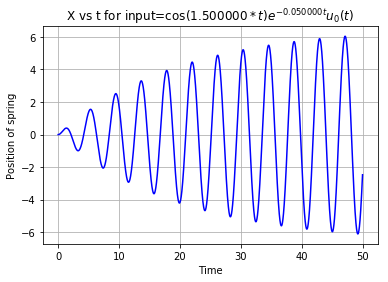

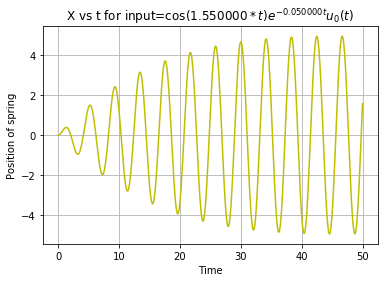

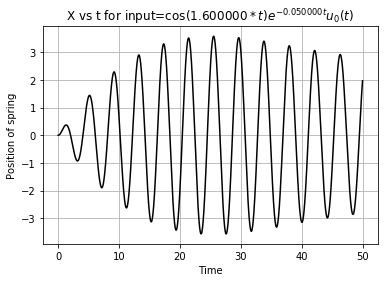

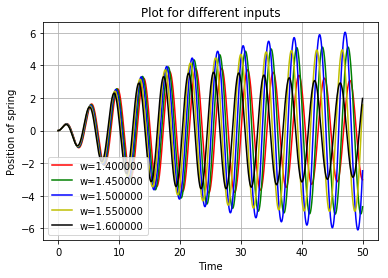

In [7]:
w_0=np.arange(1.4,1.6,0.05)
alpha=0.05
w0=1.5
H=sp.lti(1,[1,0,w0**2])
t=np.linspace(0,50,10001)
colors=['r','g','b','y','k'] #colors for different plot
i=0
Y=[] #to contain the values of output for different inputs
for w in w_0:
    func=np.cos(w*t)*np.exp(-alpha*t)*np.heaviside(t,1)
    t,y,svec=sp.lsim(H,func,t)
    Y.append(y)
    plt.plot(t,y,colors[i])
    plt.title('X vs t for input=$\cos(%f*t)e^{-%f t}u_0(t)$'%(w,alpha))
    plt.xlabel('Time')
    plt.ylabel('Position of spring')
    plt.grid()
    plt.show()
    i+=1
#to plot all in one graph
i=0
for y in Y:
    plt.plot(t,y,colors[i],label='w=%f'%w_0[i])
    i+=1
plt.grid()
plt.legend()
plt.title('Plot for different inputs')
plt.xlabel('Time')
plt.ylabel('Position of spring')
plt.show()    

# Question 4:
The coupled spring mass system:<br/>
We have a system which is governed by the following equations.<br/>
$\ddot{x}+(x-y)=0$ and $\ddot{y}+2(y-x)=0$<br/> with initial conditions $x(0)=1,\dot{x(0)}=\dot{y(0)}=y(0)=0$.<br/>
Thus by taking laplace transforms we have,<br/>
$s^2X(s)-sx(0)+X(s)-Y(s)=0$ and $s^2Y(s)+2Y(s)-2X(s)=0$.<br/>
Solving the two equations above we get,<br/>
$X(s)=\frac{s^2+2}{s(s^2+3)}$ and $Y(s)=\frac{2}{s(s^2+3)}$


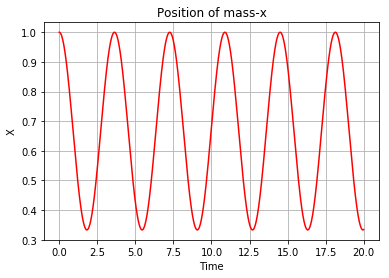

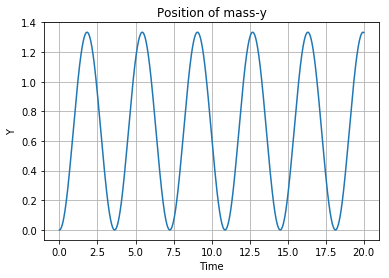

In [8]:
num_x=np.poly1d([1,0,2])
den_x=np.poly1d([1,0,3,0])
num_y=np.poly1d([2])
den_y=np.poly1d([1,0,3,0])
X=sp.lti(num_x,den_x)
Y=sp.lti(num_y,den_y)
t_x,x=sp.impulse(X,None,np.linspace(0,20,10001)) 
t_y,y=sp.impulse(Y,None,np.linspace(0,20,10001)) 
plt.plot(t_x,x,'r')
plt.title('Position of mass-x')
plt.xlabel('Time')
plt.ylabel('X')
plt.grid()
plt.show()
plt.plot(t_y,y)
plt.title('Position of mass-y')
plt.xlabel('Time')
plt.ylabel('Y')
plt.grid()
plt.show()

# Question 5:
The transfer function of the given circuit is given by:<br/>
$H(s)=\frac{1}{1+sRC+s^2LC}$<br/>
Substituting the given values of R,L and C we get $H(s)=\frac{1}{1+10^{-4}s+10^{-12}s^2}$<br/>
The transfer function has two poles as evident from the bode plots.The first pole is at $\omega=10^{4}$ and the second pole is at $\omega=10^{8}$

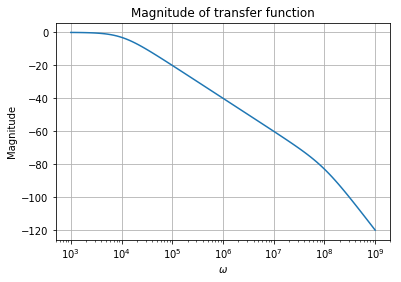

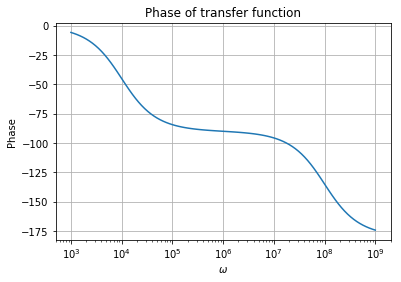

In [9]:
R=100# resistor value in Ohms
L=1e-6# inductance value in Henry
C=1e-6# capacitance value in Farad
H=sp.lti([1],[L*C,R*C,1])
w,mag,phi=H.bode()
plt.title('Magnitude of transfer function')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.semilogx(w,mag)
plt.grid()
plt.show()
plt.title('Phase of transfer function')
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.semilogx(w,phi)
plt.grid()
plt.show()

# Question 6:
Now an input signal $v_i(t)=(cos(10^3t)-cos(10^6t))u(t)$ is given to the above circuit.<br/>
The input signal has two frequencies:$\omega_1=10^3$ and $\omega_2=10^6$. The above circuit responds more the $\omega_1$ than $\omega_2$ the magnitude of transfer function at $\omega_2$ is -40dB whereas at $\omega_1$ it is 0dB.<br/>Thus The circuit is acting like a lowpass filter and is thus allowing low frequencies like $\omega_1$ to pass through it. <br/>Initially there are some transient responses in the system which happen for around 2 msec and then the output is a sinusoid function with frequency equal to 1kHz.The transients happen because some time is needed to charge the capacitor and the inductor to it's steady state value.<br/>
There are small ripples on the output voltage which are due to the attenuated higher frequency components.

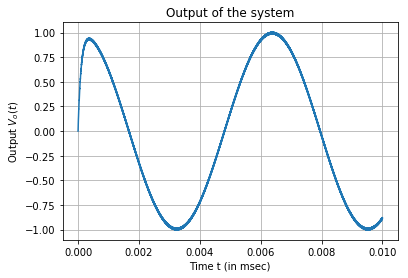

In [10]:
t=np.linspace(0,10*10**(-3),10**(4))
V_i=np.cos((10**3)*t)-np.cos((10**6)*t)
t,y,svec=sp.lsim(H,V_i,t)
plt.plot(t,y)
plt.grid()
plt.title('Output of the system')
plt.xlabel('Time t (in msec)')
plt.ylabel('Output $V_o(t)$')
plt.show()

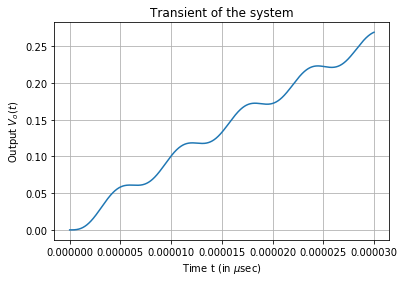

In [11]:
t=np.linspace(0,30*10**(-6),10**(4))
V_i=np.cos((10**3)*t)-np.cos((10**6)*t)
t,y,svec=sp.lsim(H,V_i,t)
plt.plot(t,y)
plt.grid()
plt.title('Transient of the system')
plt.xlabel('Time t (in $\mu$sec)')
plt.ylabel('Output $V_o(t)$')
plt.show()